In [3]:
import pandas as pd

df = pd.read_csv("diabetic_data.csv")
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df["readmitted"].value_counts()


,count
readmitted,
NO,54864
>30,35545
<30,11357


In [5]:
df["readmitted_binary"] = df["readmitted"].apply(
    lambda x: 0 if x == "NO" else 1
)


In [6]:
df["readmitted_binary"].value_counts()


,count
readmitted_binary,
0,54864
1,46902


In [7]:
features = [
    "age",
    "time_in_hospital",
    "num_lab_procedures",
    "num_medications",
    "number_inpatient",
    "number_emergency",
    "readmitted_binary"
]

df_model = df[features]
df_model.head()


,age,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_emergency,readmitted_binary
0,[0-10),1,41,1,0,0,0
1,[10-20),3,59,18,0,0,1
2,[20-30),2,11,13,1,0,0
3,[30-40),2,44,16,0,0,0
4,[40-50),1,51,8,0,0,0


In [8]:
age_mapping = {
    "[0-10)": 5,
    "[10-20)": 15,
    "[20-30)": 25,
    "[30-40)": 35,
    "[40-50)": 45,
    "[50-60)": 55,
    "[60-70)": 65,
    "[70-80)": 75,
    "[80-90)": 85,
    "[90-100)": 95
}


In [9]:
df_model["age_numeric"] = df_model["age"].map(age_mapping)


/tmp/ipython-input-1975774021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["age_numeric"] = df_model["age"].map(age_mapping)


In [10]:
df_model.head()


,age,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_emergency,readmitted_binary,age_numeric
0,[0-10),1,41,1,0,0,0,5
1,[10-20),3,59,18,0,0,1,15
2,[20-30),2,11,13,1,0,0,25
3,[30-40),2,44,16,0,0,0,35
4,[40-50),1,51,8,0,0,0,45


In [11]:
df_model.columns


Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications',
       'number_inpatient', 'number_emergency', 'readmitted_binary',
       'age_numeric'],
      dtype='object')

In [12]:
age_mapping = {
    "[0-10)": 5,
    "[10-20)": 15,
    "[20-30)": 25,
    "[30-40)": 35,
    "[40-50)": 45,
    "[50-60)": 55,
    "[60-70)": 65,
    "[70-80)": 75,
    "[80-90)": 85,
    "[90-100)": 95
}


In [13]:
df_model["age_numeric"] = df_model["age"].map(age_mapping)


/tmp/ipython-input-1975774021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["age_numeric"] = df_model["age"].map(age_mapping)


In [14]:
df_model = df_model.drop(columns=["age"])


In [15]:
df_model.head()


,time_in_hospital,num_lab_procedures,num_medications,number_inpatient,number_emergency,readmitted_binary,age_numeric
0,1,41,1,0,0,0,5
1,3,59,18,0,0,1,15
2,2,11,13,1,0,0,25
3,2,44,16,0,0,0,35
4,1,51,8,0,0,0,45


In [16]:
df_model.isnull().sum()


,0
time_in_hospital,0
num_lab_procedures,0
num_medications,0
number_inpatient,0
number_emergency,0
readmitted_binary,0
age_numeric,0


In [17]:
df_model = df_model.fillna(df_model.median())


In [18]:
df_model.isnull().sum()


,0
time_in_hospital,0
num_lab_procedures,0
num_medications,0
number_inpatient,0
number_emergency,0
readmitted_binary,0
age_numeric,0


In [19]:
X = df_model.drop(columns=["readmitted_binary"])
y = df_model["readmitted_binary"]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((81412, 6), (20354, 6), (81412,), (20354,))

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)


In [24]:
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [25]:
y_pred = log_reg.predict(X_test)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [27]:
accuracy_score(y_test, y_pred)


0.6149159870295765

In [28]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.75      0.68     10973
           1       0.61      0.46      0.52      9381

    accuracy                           0.61     20354
   macro avg       0.61      0.60      0.60     20354
weighted avg       0.61      0.61      0.61     20354



In [29]:
from sklearn.ensemble import RandomForestClassifier


In [30]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=50,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


In [31]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=50, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [32]:
y_pred_rf = rf_model.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_rf)


0.6212538076053847

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.63      0.73      0.68     10973
           1       0.61      0.49      0.54      9381

    accuracy                           0.62     20354
   macro avg       0.62      0.61      0.61     20354
weighted avg       0.62      0.62      0.62     20354



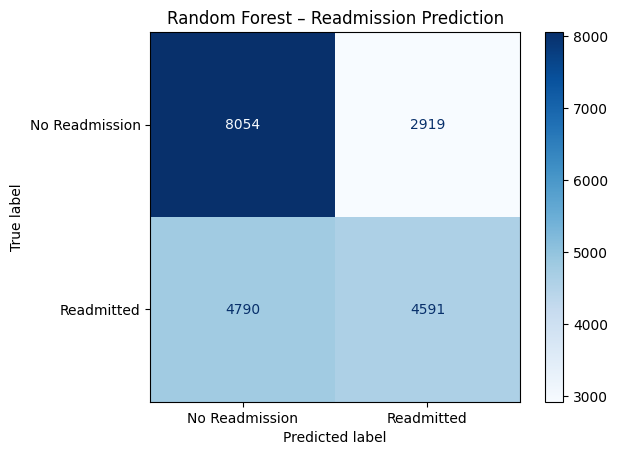

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=["No Readmission", "Readmitted"],
    cmap="Blues"
)

plt.title("Random Forest – Readmission Prediction")
plt.show()


In [36]:
import pandas as pd

feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance


,feature,importance
3,number_inpatient,0.502509
4,number_emergency,0.127320
2,num_medications,0.118752
1,num_lab_procedures,0.098776
5,age_numeric,0.088723
0,time_in_hospital,0.063920


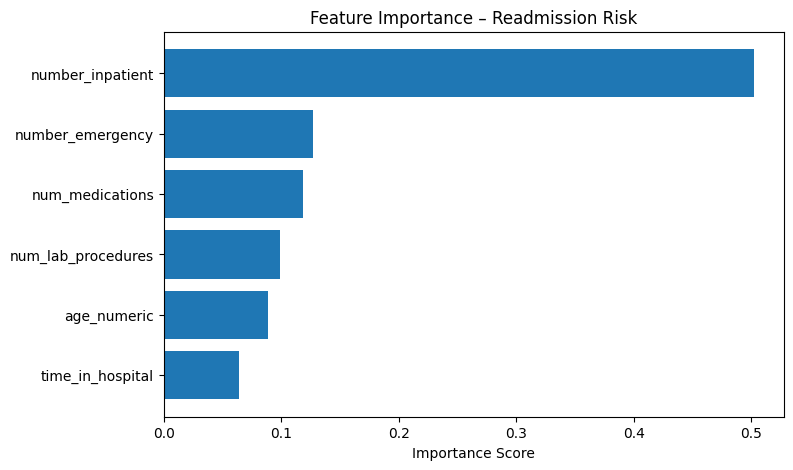

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.gca().invert_yaxis()
plt.title("Feature Importance – Readmission Risk")
plt.xlabel("Importance Score")
plt.show()


In [38]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [39]:
import numpy as np

y_pred_rf_035 = (y_proba_rf >= 0.35).astype(int)


In [40]:
print(classification_report(y_test, y_pred_rf_035))


              precision    recall  f1-score   support

           0       0.73      0.14      0.23     10973
           1       0.48      0.94      0.64      9381

    accuracy                           0.51     20354
   macro avg       0.61      0.54      0.43     20354
weighted avg       0.61      0.51      0.42     20354



In [41]:
total_readmissions = y_test.sum()
total_readmissions


np.int64(9381)

In [42]:
high_risk_patients = y_pred_rf_035.sum()
high_risk_patients


np.int64(18275)

In [43]:
prevented_readmissions = int(0.10 * total_readmissions)
prevented_readmissions


938

In [44]:
cost_savings = prevented_readmissions * 15000
cost_savings


14070000